In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

In [56]:
df=pd.read_csv('train.csv')

In [57]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [58]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [59]:
df.shape

(1460, 81)

In [60]:
#Lets find the missing values in data
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

# HeatMap

In [61]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

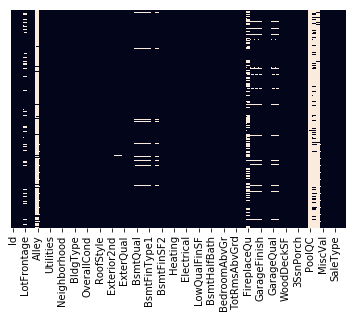

In [62]:
#lets use heatmap 
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# Fill Missing Value

In [64]:
#Fill all the missing values
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [65]:
df.drop(['Alley'],axis=1,inplace=True)

In [66]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [67]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [68]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [69]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [70]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [71]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [72]:
df.shape

(1460, 76)

In [73]:
df.drop(['Id'],axis=1,inplace=True)

In [74]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
MasVnrArea       8
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
                ..
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch   

As we see there is no missing values in data set . We fill all the missing values.

Found 8 null values in MasVnrType and 8 in MasVnrArea. will fill missing values .

In [75]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

# EDA (Exploratory Data Analysis)

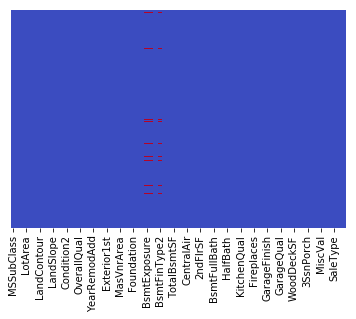

In [76]:
#Let use heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [77]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

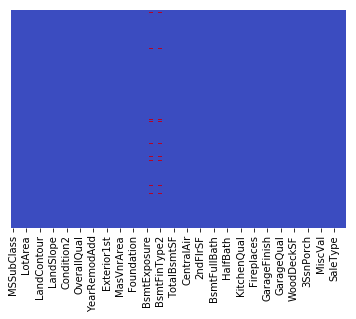

In [78]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [79]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [80]:
df.dropna(inplace=True)

In [81]:
df.shape

(1422, 75)

In [82]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


# Handle categorical Features

In [104]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
        'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
        'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
        'CentralAir',
        'Electrical','KitchenQual','Functional',
        'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [105]:
len(columns)

39

In [106]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
        
    df_final=pd.concat([final_df,df_final],axis=1)
     
    return df_final

In [107]:
main_df=df.copy()

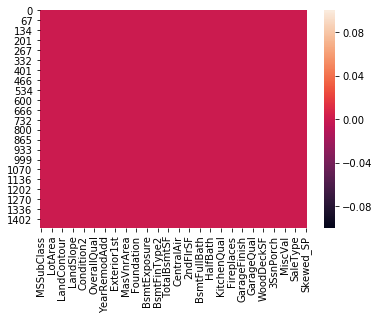

In [108]:
sns.heatmap(df.isnull())

In [86]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,...,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000
mean,56.775668,70.146723,10549.149789,6.146976,5.590717,1971.625879,1985.306610,104.935302,455.495077,47.793249,...,96.068214,47.520394,22.004923,3.374121,15.463432,2.832630,40.994374,6.327004,2007.809423,182889.092124
std,42.250147,22.260343,10097.991235,1.359483,1.109678,30.379224,20.450801,181.942463,456.272479,163.279940,...,126.144490,66.695549,61.184375,29.329871,56.442878,40.708401,493.124430,2.714278,1.326754,79414.407095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7585.750000,5.000000,5.000000,1954.000000,1968.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,131625.000000
50%,50.000000,70.049958,9501.500000,6.000000,5.000000,1974.000000,1994.000000,0.000000,400.000000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,165000.000000
75%,70.000000,79.000000,11635.500000,7.000000,6.000000,2001.000000,2004.000000,168.000000,727.000000,0.000000,...,168.000000,69.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [87]:
#lets use correlation
df_cor=df.corr
df_cor

<bound method DataFrame.corr of       MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL    65.000000     8450   Pave      Reg         Lvl   
1             20       RL    80.000000     9600   Pave      Reg         Lvl   
2             60       RL    68.000000    11250   Pave      IR1         Lvl   
3             70       RL    60.000000     9550   Pave      IR1         Lvl   
4             60       RL    84.000000    14260   Pave      IR1         Lvl   
5             50       RL    85.000000    14115   Pave      IR1         Lvl   
6             20       RL    75.000000    10084   Pave      Reg         Lvl   
7             60       RL    70.049958    10382   Pave      IR1         Lvl   
8             50       RM    51.000000     6120   Pave      Reg         Lvl   
9            190       RL    50.000000     7420   Pave      Reg         Lvl   
10            20       RL    70.000000    11200   Pave      Reg         Lvl   
11            60    

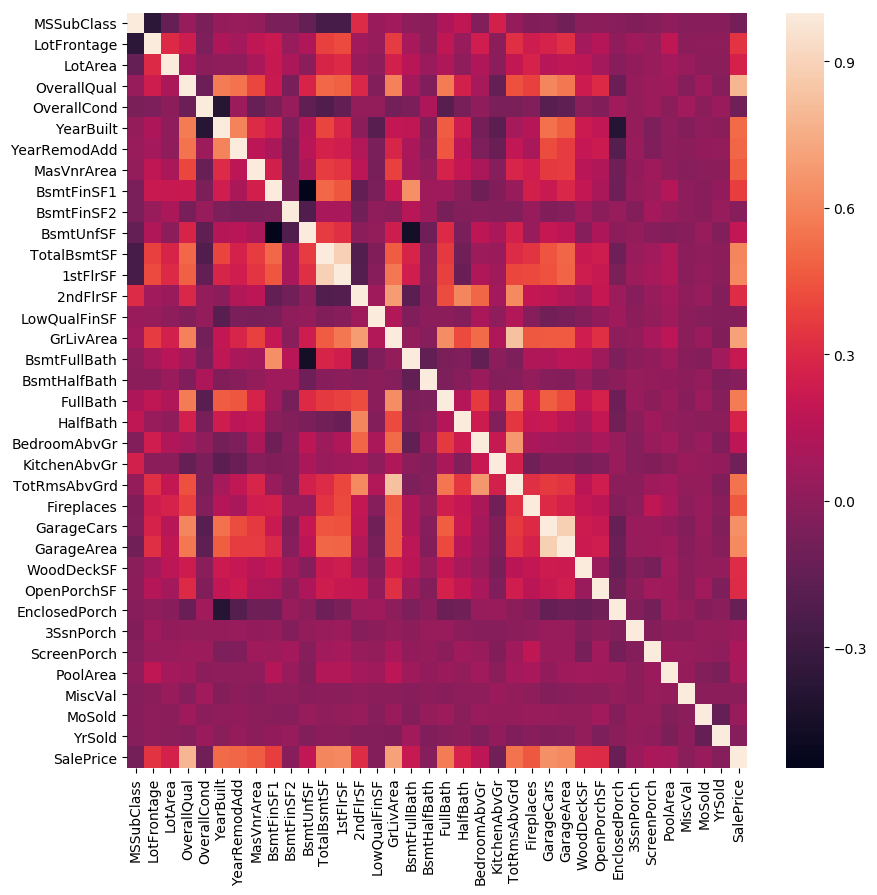

In [88]:
#lets use heatmap with corrlation
plt.figure(figsize= (10,10), dpi=100)
sns.heatmap(df.corr())

In [89]:
df ['MSSubClass'].value_counts()

20     520
60     298
50     141
120     87
30      69
160     63
70      60
80      57
90      38
190     28
85      19
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [90]:
df['SalePrice'].value_counts()

140000    20
135000    17
145000    14
155000    14
110000    13
190000    13
160000    12
139000    11
130000    11
115000    11
180000    10
125000    10
143000    10
185000    10
175000     9
127000     9
144000     9
147000     9
230000     8
176000     8
165000     8
200000     8
129000     8
250000     8
141000     8
170000     8
215000     8
100000     8
174000     7
173000     7
          ..
165150     1
178740     1
262280     1
132250     1
185500     1
99500      1
103600     1
183900     1
312500     1
215200     1
269500     1
328900     1
128200     1
130250     1
183500     1
140200     1
582933     1
150750     1
126175     1
186000     1
369900     1
395192     1
224500     1
75000      1
181500     1
245000     1
263435     1
201800     1
154900     1
164900     1
Name: SalePrice, Length: 647, dtype: int64

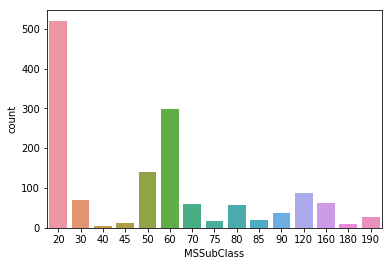

In [91]:
#visualize the the number of employees that stayed and left the company
sns.countplot(df['MSSubClass'])

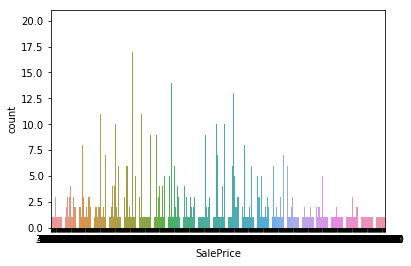

In [92]:
#visualize the the number of employees that stayed and left the company
sns.countplot(df['SalePrice'])

In [41]:
#combine test data
test_df=pd.read_csv('formulatedtest.csv')

In [42]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [43]:
test_df.shape

(1459, 74)

Skew is: 1.8919117627933302


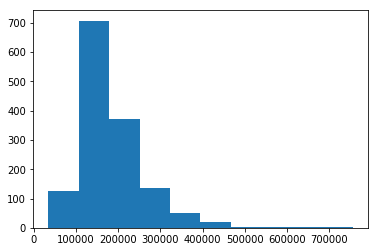

Skew is: 0.14113420841614385


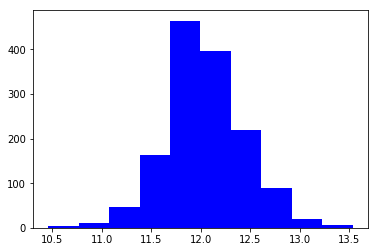

In [93]:
# Determining the Skewness of data 
print ("Skew is:", df.SalePrice.skew())

plt.hist(df.SalePrice)
plt.show()

# After log transformation of the data it looks much more center aligned
df['Skewed_SP'] = np.log(df['SalePrice']+1)
print ("Skew is:", df['Skewed_SP'].skew())
plt.hist(df['Skewed_SP'], color='blue')
plt.show()

In [109]:
final_df=pd.concat([df,test_df],axis=0)

In [110]:
final_df.shape

(2881, 76)

In [111]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [112]:
final_df.shape

(2881, 236)

In [113]:
final_df=final_df.loc[:,~final_df.columns.duplicated()]

In [114]:
final_df.shape

(2881, 176)

In [115]:
df_Train=final_df.iloc[:1422,:]
df_Test=final_df.iloc[1422:,:]

In [116]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

In [117]:
df_Test.shape

(1459, 175)

In [118]:
final_df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,1,1,0,0,0,0,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,1,1,0,0,0,0,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,1,1,0,0,0,0,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,1,0,0,0,0,1,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,1,1,0,0,0,0,1,0


In [119]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

# Model Evaluation

# Random Forest

In [122]:
#lets use Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [123]:
#Test the model accuracy on the training set
model = forest
model.score(X_train,y_train)

0.9950773558368495

20     520
60     298
50     141
120     87
30      69
160     63
70      60
80      57
90      38
190     28
85      19
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

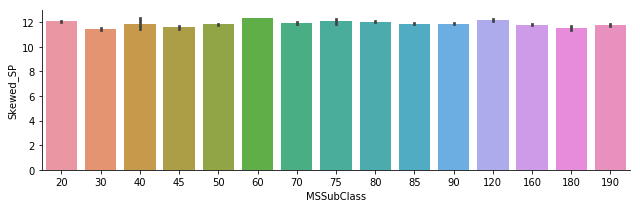

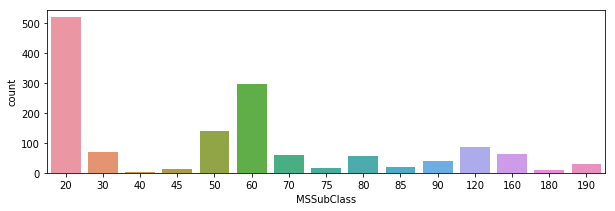

In [127]:
sns.factorplot('MSSubClass', 'Skewed_SP', data=df,kind='bar',size=3,aspect=3)
fig, (axis1) = plt.subplots(1,1,figsize=(10,3))
sns.countplot('MSSubClass', data=df)
df['MSSubClass'].value_counts()

RL         1118
RM          214
FV           65
RH           15
C (all)      10
Name: MSZoning, dtype: int64

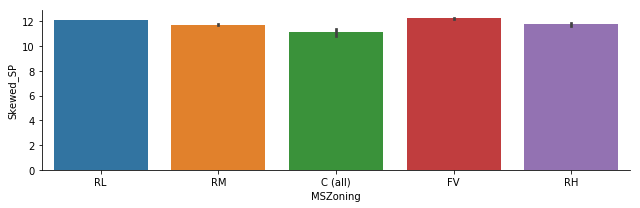

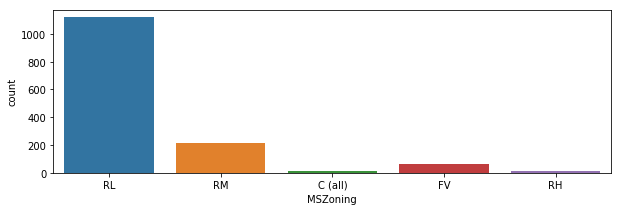

In [133]:
sns.factorplot('MSZoning', 'Skewed_SP', data=df,kind='bar',size=3,aspect=3)
fig, (axis1) = plt.subplots(1,1,figsize=(10,3))
sns.countplot(x='MSZoning', data=df, ax=axis1)
df['MSZoning'].value_counts()

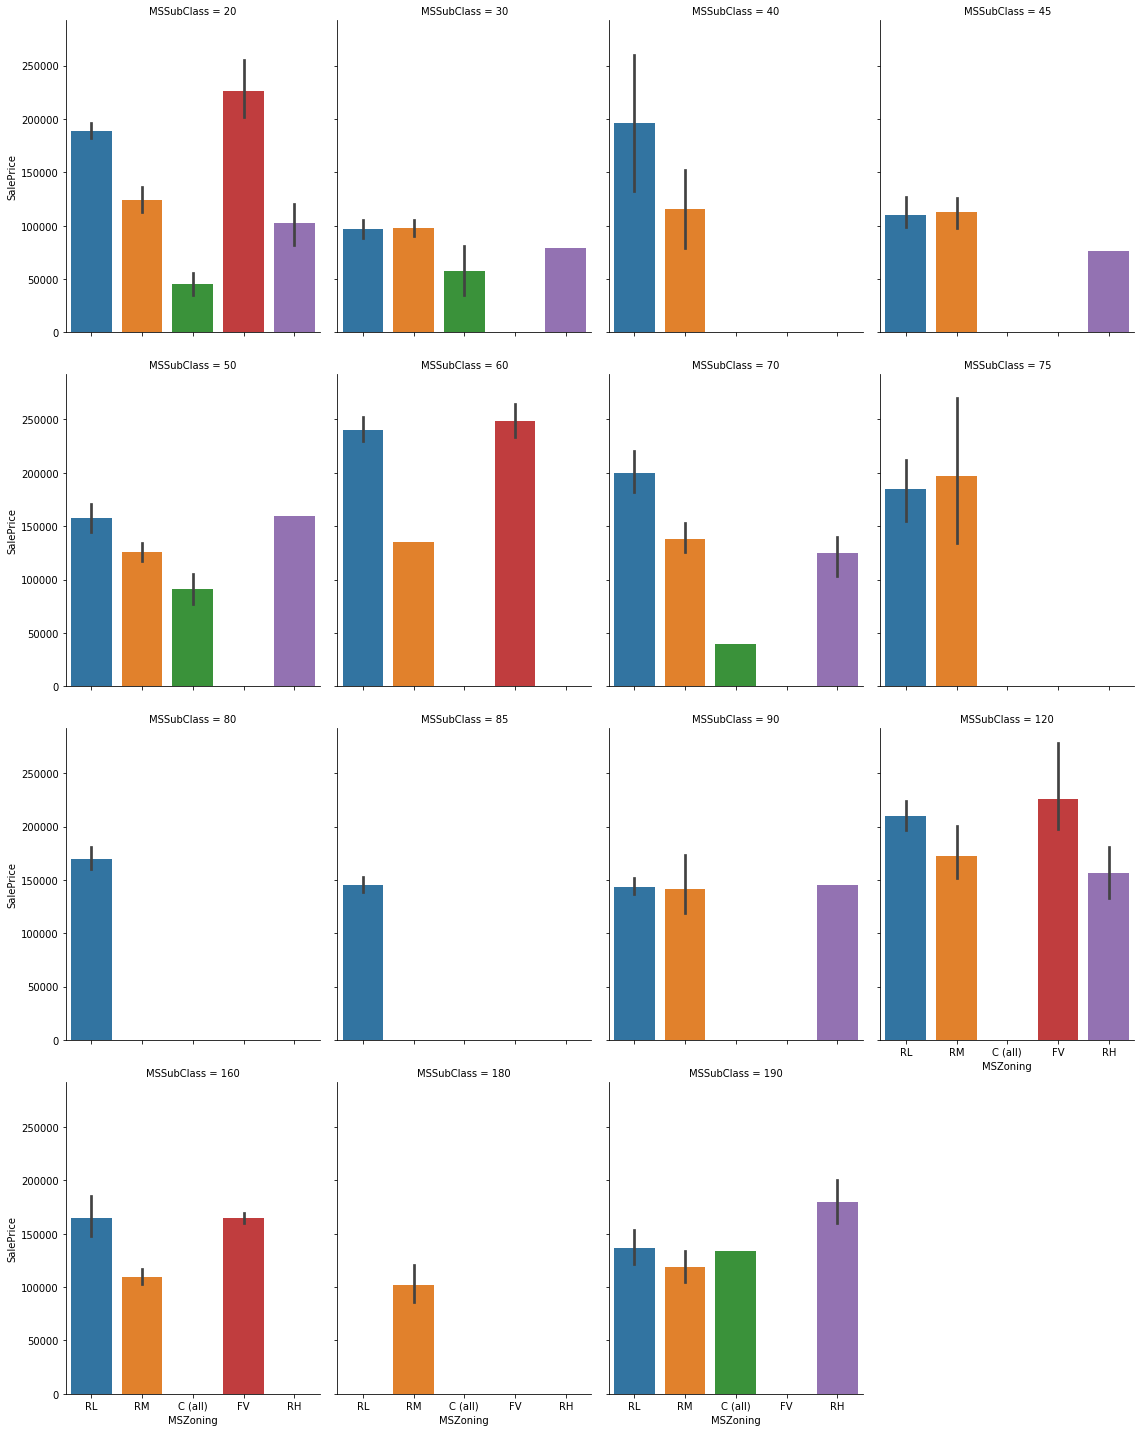

In [134]:
sns.factorplot(x='MSZoning', y='SalePrice', col='MSSubClass', data=df, kind='bar', col_wrap=4, aspect=0.8)

In [135]:
numerical_features = df.select_dtypes(include=[np.number])
numerical_features.dtypes

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
Skewed_SP        float64
dtype: object

In [136]:
# Then we will try to find the corretation between the feature and target
corr = numerical_features.corr()
#print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[:], '\n')

SalePrice        1.000000
Skewed_SP        0.949305
OverallQual      0.787985
GrLivArea        0.709303
GarageCars       0.643039
GarageArea       0.622604
1stFlrSF         0.613887
TotalBsmtSF      0.610085
FullBath         0.573755
TotRmsAbvGrd     0.542785
YearBuilt        0.519014
YearRemodAdd     0.500512
MasVnrArea       0.470117
Fireplaces       0.461108
BsmtFinSF1       0.371987
LotFrontage      0.335397
WoodDeckSF       0.316252
2ndFlrSF         0.313502
OpenPorchSF      0.308757
HalfBath         0.271311
LotArea          0.263815
BsmtFullBath     0.211534
BsmtUnfSF        0.189384
BedroomAbvGr     0.166433
ScreenPorch      0.106284
PoolArea         0.091944
3SsnPorch        0.046233
MoSold           0.044061
MiscVal         -0.013616
BsmtFinSF2      -0.018805
BsmtHalfBath    -0.023147
YrSold          -0.025469
LowQualFinSF    -0.028858
MSSubClass      -0.084471
OverallCond     -0.095475
KitchenAbvGr    -0.104372
EnclosedPorch   -0.134379
Name: SalePrice, dtype: float64 



In [137]:
df.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [138]:
#Creating a pivot table 
quality_pivot = df.pivot_table(index='OverallQual',values='SalePrice', aggfunc=np.median)

In [139]:
quality_pivot

,SalePrice
OverallQual,
1,61000.0
2,60000.0
3,83000.0
4,109900.0
5,133900.0
6,160000.0
7,200570.5
8,269750.0
9,345000.0


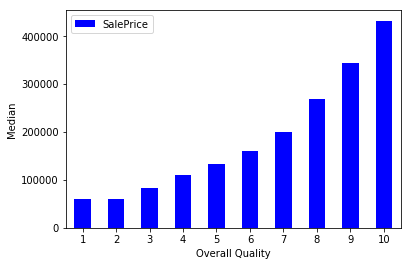

In [140]:
quality_pivot.plot(kind='bar',color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median')
plt.xticks(rotation=0)
plt.show()

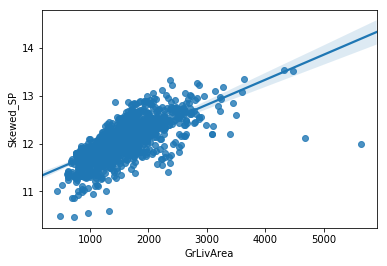

In [141]:
sns.regplot(x='GrLivArea',y='Skewed_SP',data=df)

SalePrice increases as the GrLivArea increases. We will also get rid of the outliers which severely affect the prediction of the survival rate.

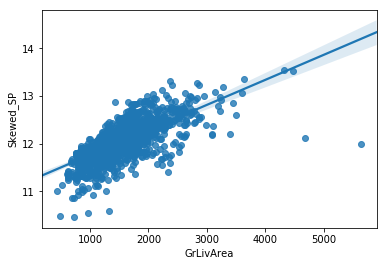

In [142]:
#Removing outliers
df1 = df[df['GrLivArea'] < 4000]
sns.regplot(x='GrLivArea',y='Skewed_SP',data=df)

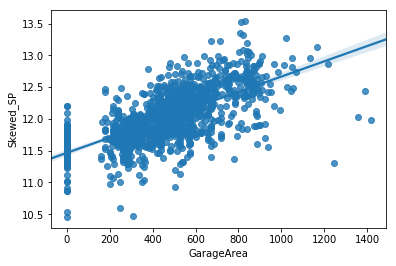

In [143]:
sns.regplot(x='GarageArea',y='Skewed_SP',data=df)

GarageArea and SalePrice are directly proportional.

We will again get rid of the outliers.

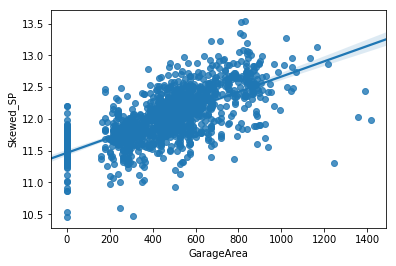

In [144]:
#Removing outliers
df1 = df[df['GarageArea'] < 1200]
sns.regplot(x='GarageArea',y='Skewed_SP',data=df)

In [69]:
#Removing the null values
nulls = pd.DataFrame(house.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
Skewed_SP,0
Foundation,0
RoofMatl,0
Exterior1st,0
Exterior2nd,0
MasVnrType,0
MasVnrArea,0
ExterQual,0
ExterCond,0


In [145]:
#Analysing the non numeric data 
categoricals = df.select_dtypes(exclude=[np.number])
categoricals.describe(include='all')

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1422,1422,1422,1422,1422,1422,1422,1422,1422,1422,...,1422,1422,1422,1422,1422,1422,1422,1422,1422,1422
unique,5,2,4,4,2,5,3,25,9,8,...,4,7,5,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1118,1416,892,1277,1421,1023,1345,215,1230,1407,...,706,1331,1037,935,654,1354,1371,1313,1231,1165


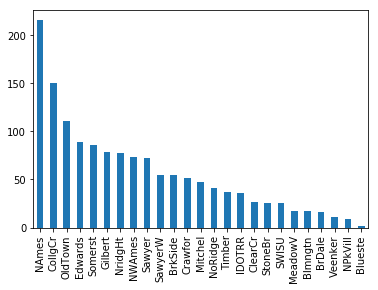

In [146]:
df['Neighborhood'].value_counts().plot(kind='bar')

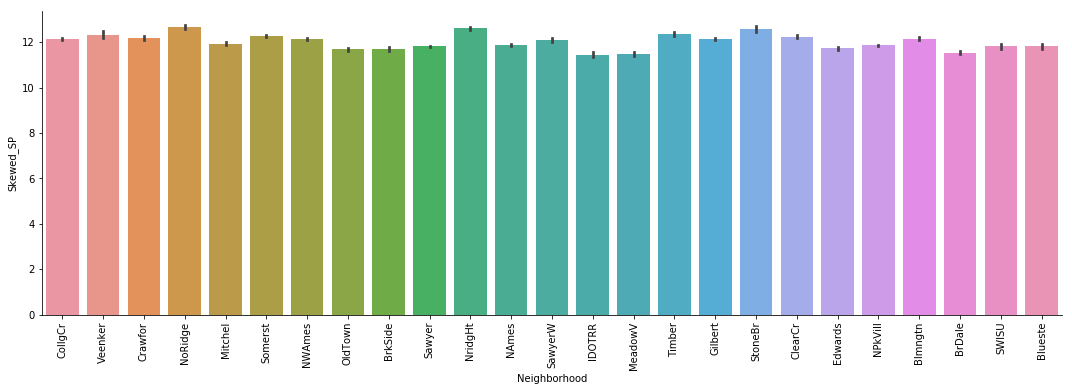

In [147]:
g = sns.factorplot(x='Neighborhood', y='Skewed_SP', data=df, kind='bar', aspect=3)
g.set_xticklabels(rotation=90)

In [148]:
df['Condition1'].value_counts()

Norm      1230
Feedr       75
Artery      47
RRAn        26
PosN        19
RRAe        10
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [149]:
df['Condition2'].value_counts()

Norm      1407
Feedr        6
Artery       2
PosN         2
RRNn         2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64

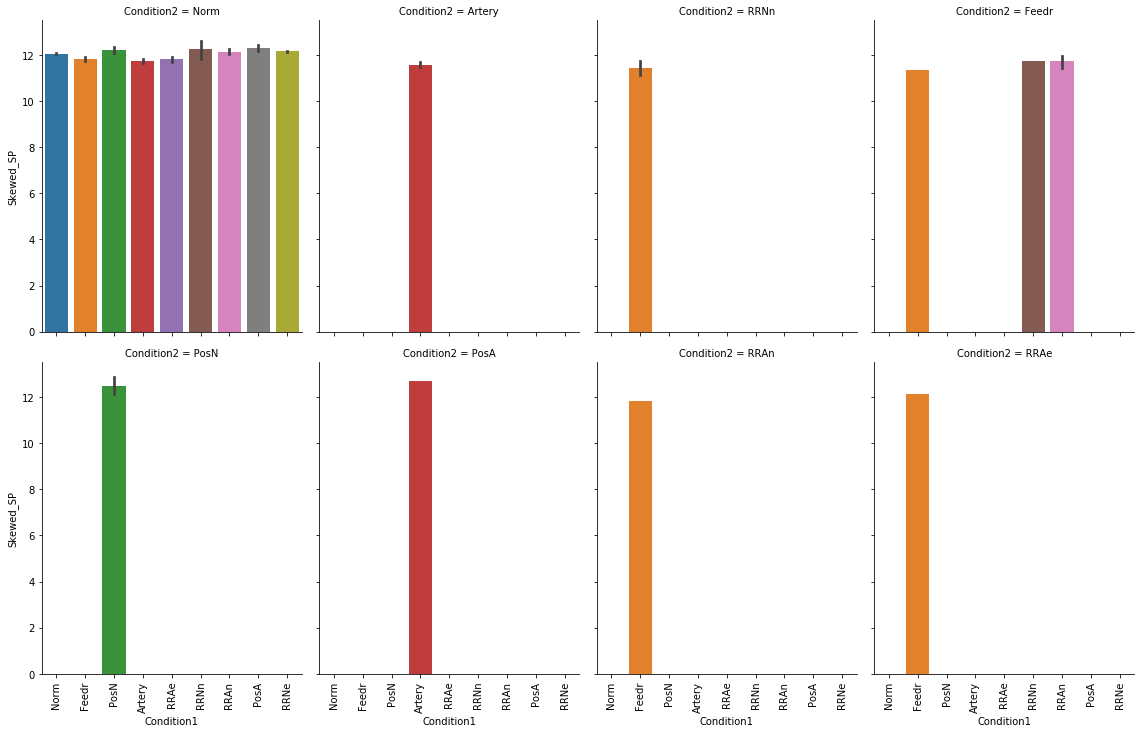

In [151]:
g = sns.factorplot(x='Condition1', y='Skewed_SP', col='Condition2', data=df, kind='bar', col_wrap=4, aspect=0.8)
g.set_xticklabels(rotation=90)

In [152]:
df['SaleCondition'].value_counts()

Normal     1165
Partial     125
Abnorml     100
Family       20
Alloca        9
AdjLand       3
Name: SaleCondition, dtype: int64

In [153]:
df['SaleType'].value_counts()

WD       1231
New       122
COD        42
ConLD       8
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

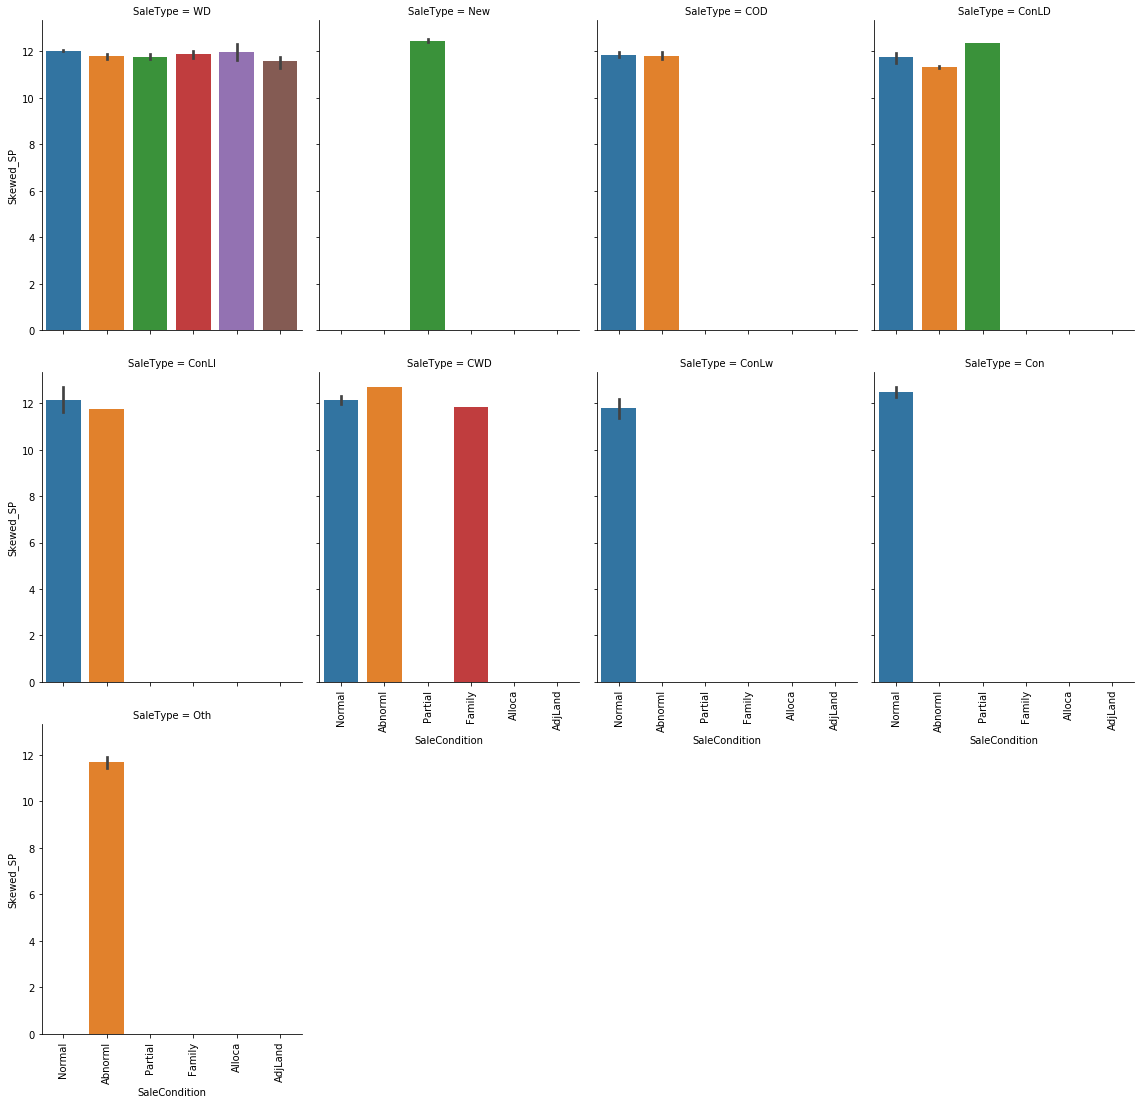

In [154]:
g = sns.factorplot(x='SaleCondition', y='Skewed_SP', col='SaleType', data=df, kind='bar', col_wrap=4, aspect=0.8)
g.set_xticklabels(rotation=90)

In [81]:
#Data Trasformation 
print ("Original: \n") 
print (house.Street.value_counts(), "\n")

Original: 

Pave    1416
Grvl       6
Name: Street, dtype: int64 



In [155]:
# Turn into one hot encoding 
df['enc_street'] = pd.get_dummies(df.Street, drop_first=True)

In [83]:
# Encoded 
print ('Encoded: \n') 
print (house.enc_street.value_counts())

Encoded: 

1    1416
0       6
Name: enc_street, dtype: int64


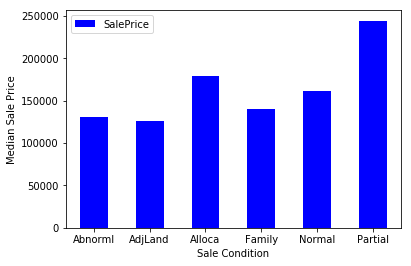

In [84]:
# Feature Engineering
condition_pivot = df.pivot_table(index='SaleCondition',
                                    values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [85]:
def encode(x): return 1 if x == 'Partial' else 0
df['enc_condition'] = df.SaleCondition.apply(encode)

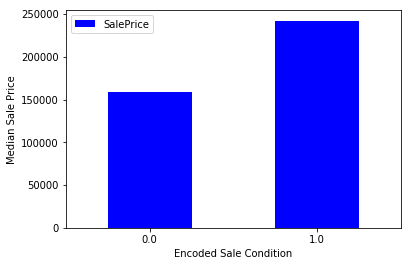

In [86]:
condition_pivot = df.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [87]:
#Interpolation of data 
data = house.select_dtypes(include=[np.number]).interpolate().dropna()

In [88]:
sum(data.isnull().sum() != 0)

0

# Model Evaluation

In [128]:
from sklearn import linear_model
from sklearn import ensemble
lr = ensemble.GradientBoostingRegressor()

In [129]:
model = lr.fit(X_train, y_train)

In [132]:
print ("R^2 is: \n", model.score(X_train, y_train))

R^2 is: 
 0.9999367794767109


In [159]:
#lets use Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [160]:
#Test the model accuracy on the training set
model = forest
model.score(X_train,y_train)

0.9950773558368495

In [161]:
final_df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,1,1,0,0,0,0,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,1,1,0,0,0,0,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,1,1,0,0,0,0,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,1,0,0,0,0,1,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,1,1,0,0,0,0,1,0
